# GENDER BASED VIOLENCE EXPLORATION

The following exercise aims to gain insights into the following questions:
1.The extent of gender based violence in Kenya.
2.The common excuse of Gender Based Violence.
3.How do both gender compare when it comes to supporting the vice.

In [1]:
#import libraies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('violence_data.csv')
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [3]:
#simple stat about the data.
df.describe(include='all')

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
count,12600.000000,12600,12600,12600,12600,12600,12600,11187.000000
unique,NaN,70,2,5,15,6,18,NaN
top,NaN,Afghanistan,F,Education,Never married,... if she burns the food,01/01/2013,NaN
freq,NaN,180,6300,3360,840,2100,1980,NaN
mean,210.500000,NaN,NaN,NaN,NaN,NaN,NaN,19.762537
std,121.248024,NaN,NaN,NaN,NaN,NaN,NaN,16.986437
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,105.750000,NaN,NaN,NaN,NaN,NaN,NaN,6.200000
50%,210.500000,NaN,NaN,NaN,NaN,NaN,NaN,14.900000
75%,315.250000,NaN,NaN,NaN,NaN,NaN,NaN,29.200000


In [9]:
df['Demographics Response'].unique()

array(['Never married', 'Higher', 'Secondary', 'Primary',
       'Widowed, divorced, separated', 'Employed for kind', '15-24',
       'Unemployed', 'Rural', '25-34', 'Married or living together',
       'Urban', '35-49', 'No education', 'Employed for cash'],
      dtype=object)

In [10]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', "Cote d'Ivoire", 'Dominican Republic',
       'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'India', 'Indonesia', 'Jordan', 'Kenya', 'Kyrgyz Republic',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'Yemen', 'Zambia',
       'Zimbabwe'], dtype=object)

In [11]:
#the question that was contained in the questionare.
df['Question'].unique()

array(['... if she burns the food',
       '... for at least one specific reason',
       '... if she argues with him',
       '... if she goes out without telling him',
       '... if she neglects the children',
       '... if she refuses to have sex with him'], dtype=object)

In [7]:
#lets explore on the extent of the GBV cases in Kenya.
gbv_k=df[df['Country']=='Kenya']
gbv_k

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
6120,385,Kenya,F,Age,15-24,... for at least one specific reason,01/01/2014,42.0
6121,385,Kenya,F,Age,25-34,... for at least one specific reason,01/01/2014,39.8
6122,385,Kenya,F,Age,35-49,... for at least one specific reason,01/01/2014,44.0
6123,105,Kenya,F,Age,15-24,... if she argues with him,01/01/2014,20.9
6124,105,Kenya,F,Age,25-34,... if she argues with him,01/01/2014,20.1
...,...,...,...,...,...,...,...,...
6295,175,Kenya,M,Residence,Urban,... if she goes out without telling him,01/01/2014,16.1
6296,245,Kenya,M,Residence,Rural,... if she neglects the children,01/01/2014,27.7
6297,245,Kenya,M,Residence,Urban,... if she neglects the children,01/01/2014,26.9
6298,315,Kenya,M,Residence,Rural,... if she refuses to have sex with him,01/01/2014,10.9


In [53]:
#the number of cases involving refusal to engage in sex with a partner in kenya.
gbv_k[gbv_k.Question=='... if she refuses to have sex with him'].count()



RecordID                 30
Country                  30
Gender                   30
Demographics Question    30
Demographics Response    30
Question                 30
Survey Year              30
Value                    30
dtype: int64

# visualisation.


C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_10788\1326460331.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.catplot(x = 'Demographics Response', y = 'Value', hue = 'Question',
C:\Users\SOLOMON\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


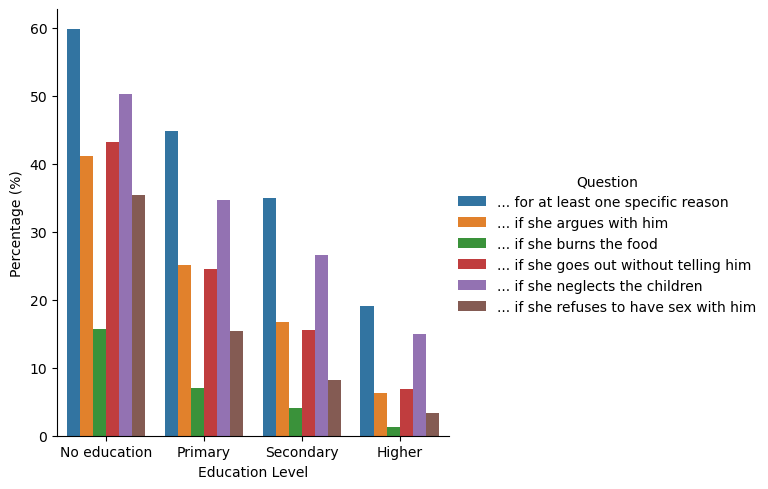

In [57]:
#INVESTIGATING HOW THE LEVEL OF EDUCATION RELATES TO EDUCATIONALM LEVEL.
data = gbv_k[gbv_k['Demographics Question'] == 'Education']
chart = sns.catplot(x = 'Demographics Response', y = 'Value', hue = 'Question',
                         order = ['No education', 'Primary', 'Secondary', 'Higher'],
                         data = data, kind = 'bar',ci=None)
chart.set_axis_labels('Education Level', 'Percentage (%)')

-The level of education is determinant when it comes to gender based violence those who did not attend school are records the highest casualities.


C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_10788\38153305.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.catplot(x = 'Demographics Response', y = 'Value', hue = 'Question',
C:\Users\SOLOMON\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


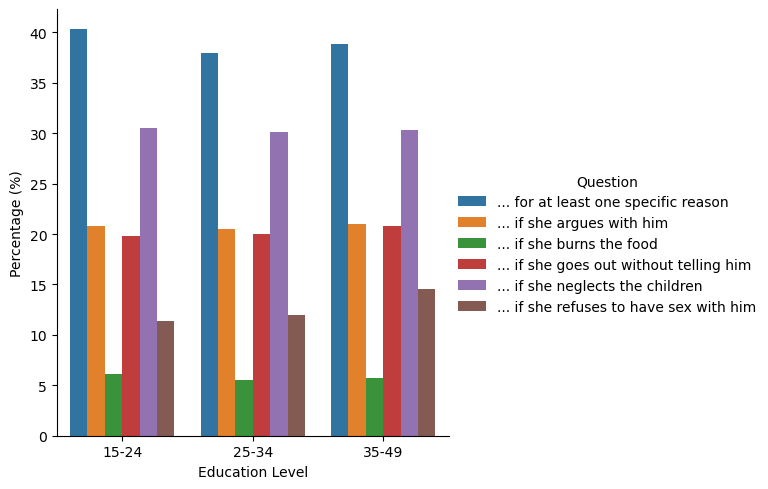

In [65]:
#gender based violence based on age brackets.
data = gbv_k[gbv_k['Demographics Question'] == 'Age']
chart = sns.catplot(x = 'Demographics Response', y = 'Value', hue = 'Question',
                         order = ['15-24', '25-34', '35-49'],
                         data = data, kind = 'bar',ci=None)
chart.set_axis_labels('Education Level', 'Percentage (%)')

-Gender based violence cuts across all age bracket between 15-49.


<Axes: title={'center': 'TOP TEN COUNTRIES'}, xlabel='Country', ylabel='Number of cases'>

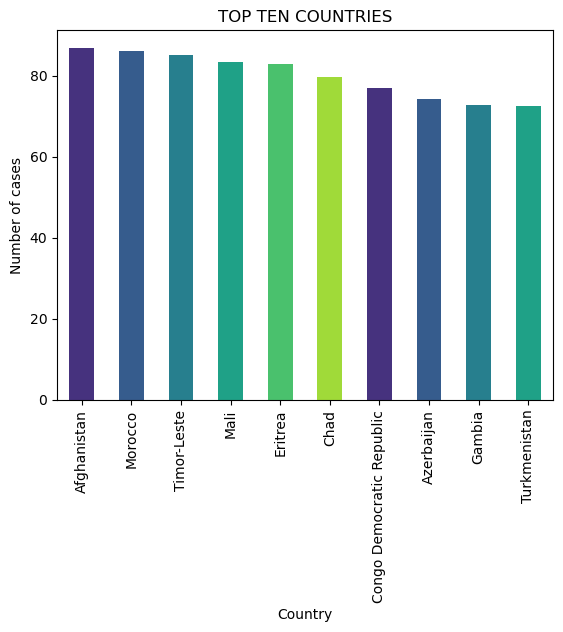

In [68]:
df.groupby('Country')['Value'].max().sort_values(ascending=False).head(10).plot(kind='bar',title=('TOP TEN COUNTRIES'),ylabel='Number of cases',color=sns.color_palette('viridis'))

-The highest countries with highest cases of GBV.
-Afghanistan leads with the GBV.

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_2628\3074733109.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.catplot(x = 'Demographics Response', y = 'Value', hue = 'Gender',
C:\Users\SOLOMON\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


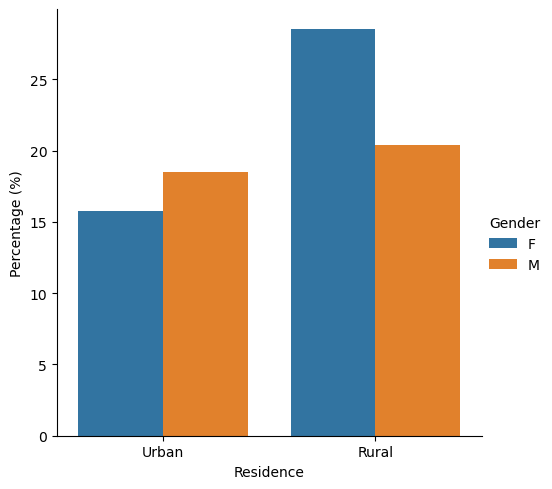

In [9]:

data = gbv_k[gbv_k['Demographics Question'] == 'Residence']
chart = sns.catplot(x = 'Demographics Response', y = 'Value', hue = 'Gender',
                         order = ['Urban', 'Rural'],
                         data = data, kind = 'bar', ci=None)
chart.set_axis_labels('Residence', 'Percentage (%)')

Kenyans living in rural areas recorded the highest numbers of gender based violence as compared to those based in urban settings.

In [13]:
compare_countries = df[(df.Country == "Kenya") | (df.Country == "Guatemala") | (df.Country == "Indonesia")]
compare_countries

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
4680,27,Guatemala,F,Education,Higher,... if she burns the food,01/01/2014,0.1
4681,27,Guatemala,F,Education,Secondary,... if she burns the food,01/01/2014,1.1
4682,27,Guatemala,F,Residence,Urban,... if she burns the food,01/01/2014,1.8
4683,27,Guatemala,F,Employment,Employed for cash,... if she burns the food,01/01/2014,3.2
4684,27,Guatemala,F,Age,25-34,... if she burns the food,01/01/2014,3.4
...,...,...,...,...,...,...,...,...
6295,175,Kenya,M,Residence,Urban,... if she goes out without telling him,01/01/2014,16.1
6296,245,Kenya,M,Residence,Rural,... if she neglects the children,01/01/2014,27.7
6297,245,Kenya,M,Residence,Urban,... if she neglects the children,01/01/2014,26.9
6298,315,Kenya,M,Residence,Rural,... if she refuses to have sex with him,01/01/2014,10.9


C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_2628\1080944570.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x='Demographics Response', y='Value', col='Country', row='Gender',
C:\Users\SOLOMON\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'comparison between  2 countries against Kenya')

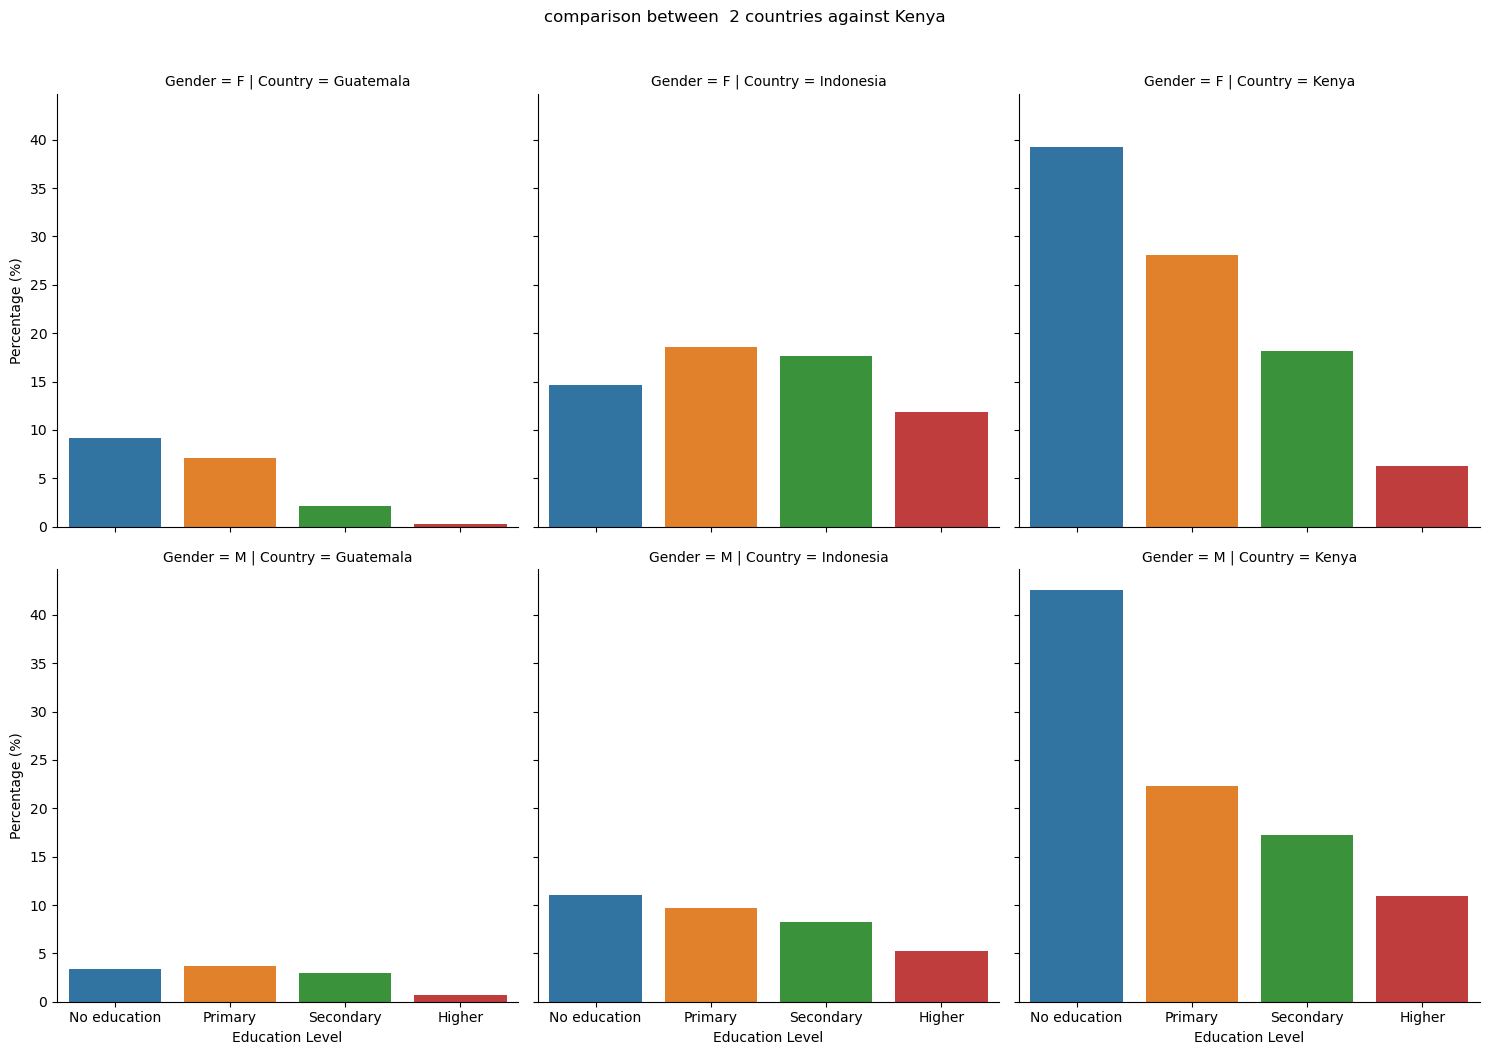

In [14]:
graph = compare_countries[compare_countries['Demographics Question'] == 'Education']

g = sns.catplot(x='Demographics Response', y='Value', col='Country', row='Gender',
               order = ["No education", "Primary", "Secondary", "Higher"],
               data=graph, kind='bar', ci=None)
g.set_axis_labels('Education Level', 'Percentage (%)')
g.fig.suptitle("comparison between  2 countries against Kenya", y=1.05)

Country like Guatemala had low number of gbv incidences.
Kenya leads in cases of GBV as compared to the other two nations
